In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import math
from warnings import filterwarnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
filterwarnings("ignore",category=FutureWarning)

# Data Preparation

In [3]:
data = pd.read_excel('heart_disease.xlsx', sheet_name = 'Heart_disease')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
data.describe()    #describing data

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [5]:
data.dtypes     #type of data

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs            bool
restecg      object
thalch        int64
exang        object
oldpeak     float64
slope        object
thal         object
num           int64
dtype: object

In [6]:
data.shape

(908, 13)

# EDA

In [7]:
data.isnull().sum()    #null values

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [8]:
data.nunique()     #unique values

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         4
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

In [9]:
data['cp'].value_counts()

cp
asymptomatic       495
non-anginal        203
atypical angina    165
typical angina      45
Name: count, dtype: int64

In [10]:
data['slope'].value_counts()

slope
flat           453
upsloping      298
downsloping    157
Name: count, dtype: int64

In [11]:
data['num'].value_counts()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [12]:
data['num'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

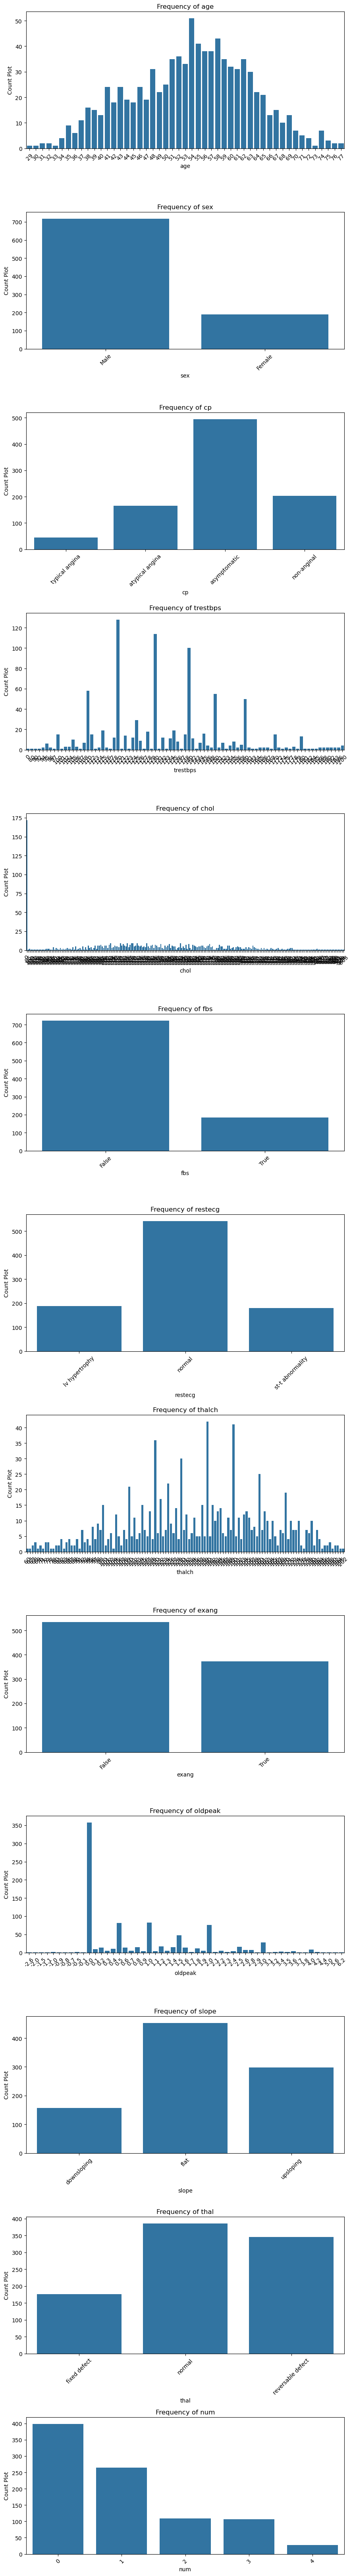

In [46]:
# Create a single figure with multiple subplots
fig, axes = plt.subplots(len(data.columns), 1, figsize=(9, len(data.columns) * 5))

# Plot count plots for each categorical column
for i, column in enumerate(data.columns):
    sns.countplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f'Frequency of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count Plot')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [14]:
# replace values (some true and false value are worng in this columns so replaced that)
data.replace({'TURE': True, 'FALSE': False}, inplace=True)

In [15]:
data['exang'].unique()

array([False,  True])

### Histogram

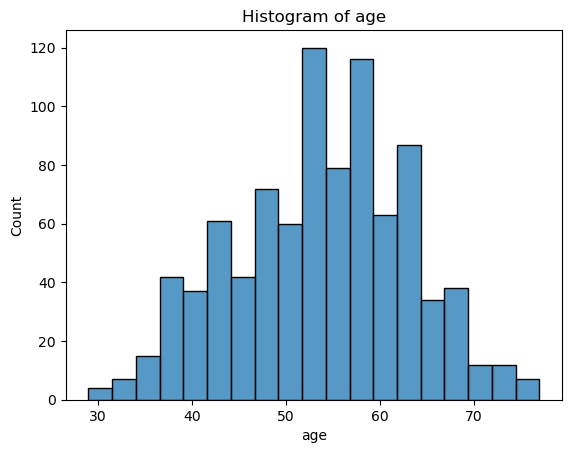

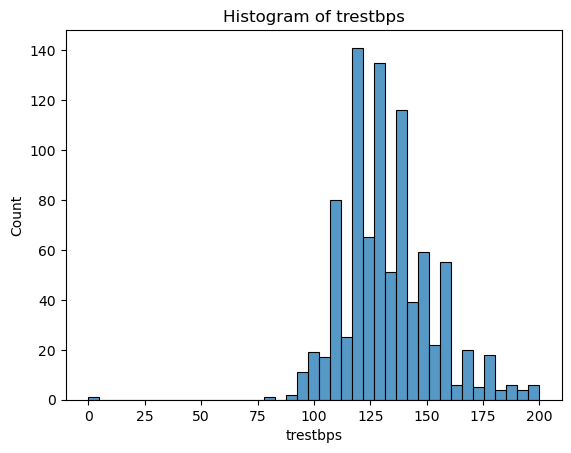

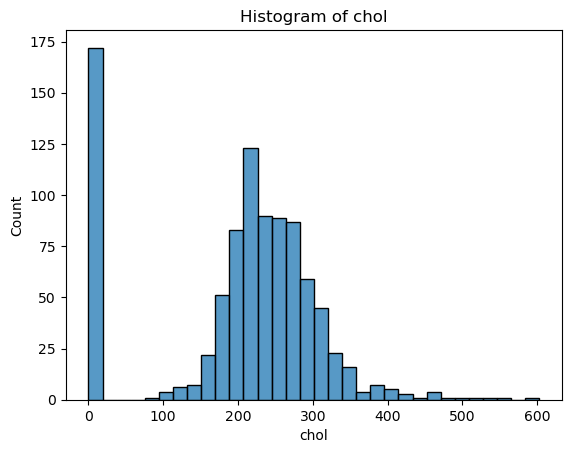

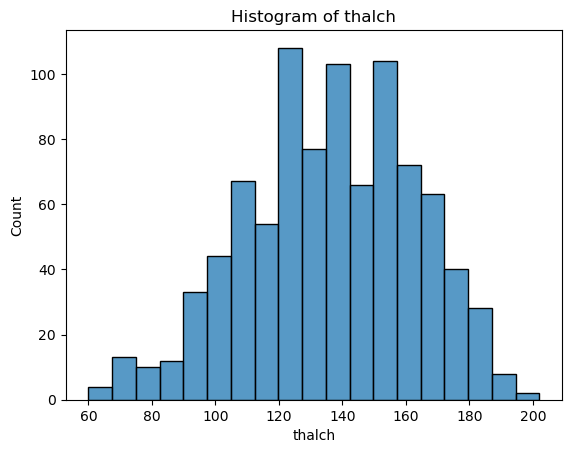

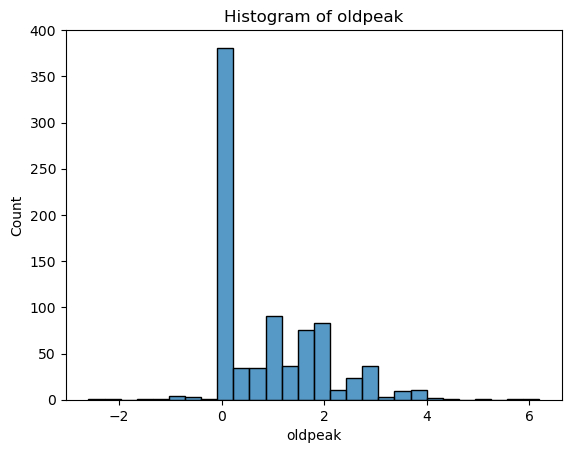

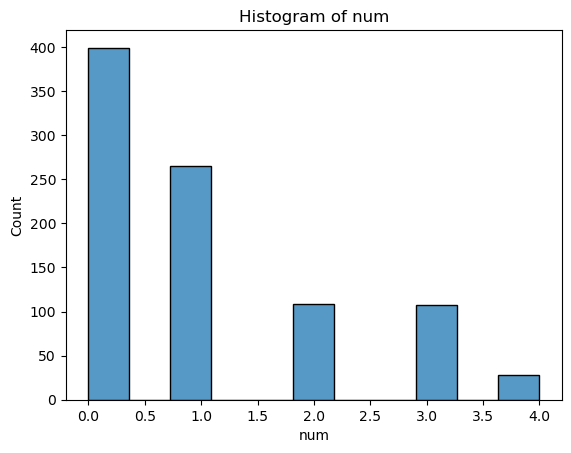

In [16]:
columns = ['age','trestbps','chol','thalch','oldpeak','num']
for column in columns:
    sns.histplot(data[column])
    plt.title(f'Histogram of {column}')
    plt.show()

### Boxplot

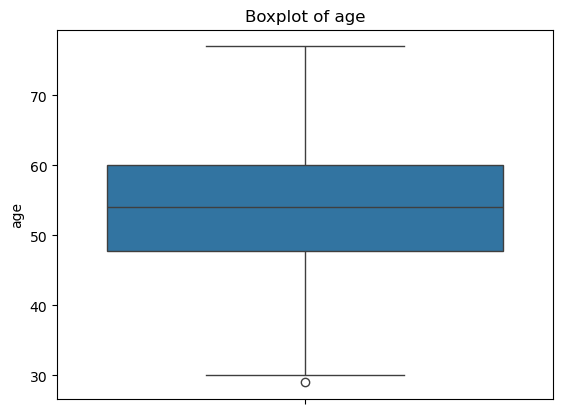

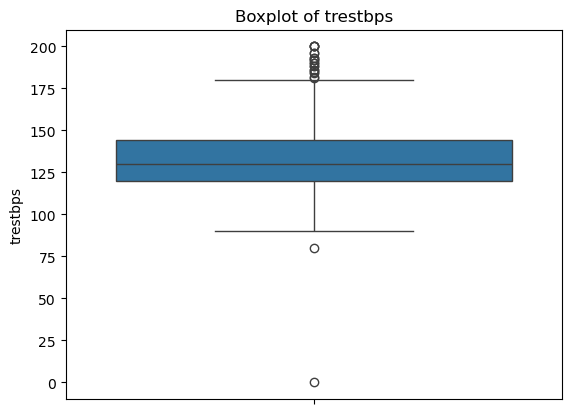

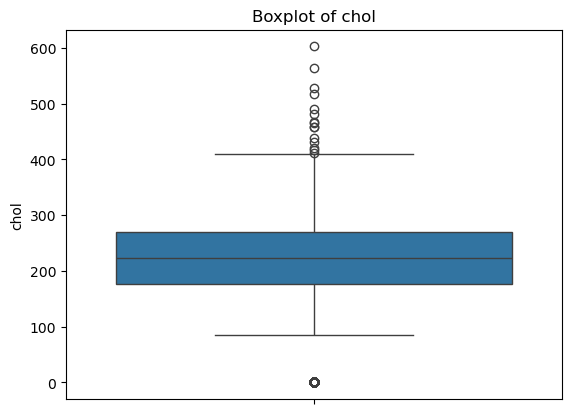

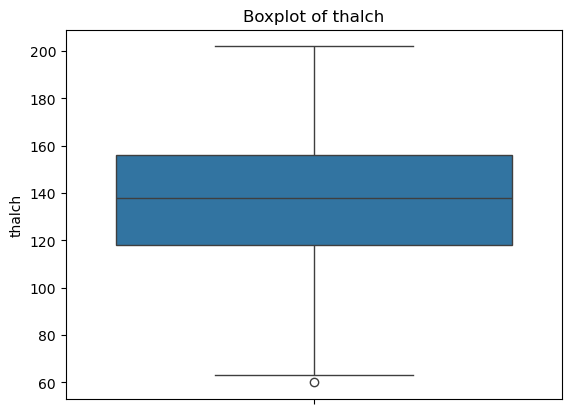

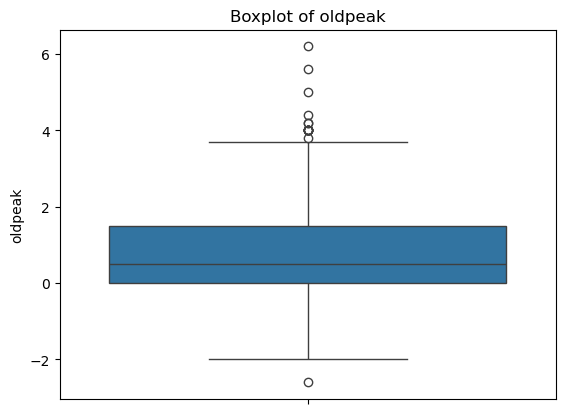

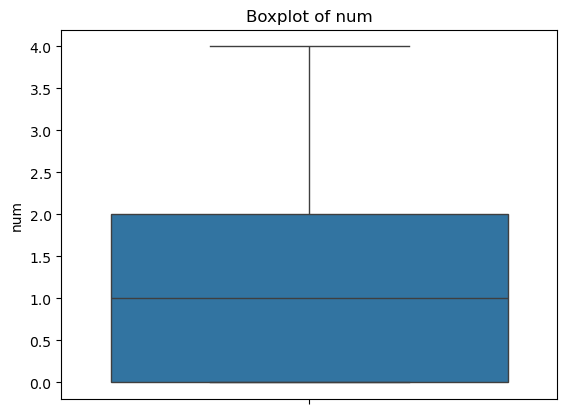

In [17]:
columns = ['age','trestbps','chol','thalch','oldpeak','num']
for column in columns:
    sns.boxplot(data[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [18]:
# missing value imputation in oldpeak
data['oldpeak'] = data['oldpeak'].fillna(data['oldpeak'].median())

In [19]:
data.isnull().sum()  #null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [20]:
def remove_outliers(data, threshold=4):
    clean = data.copy()                  
    for column in clean.select_dtypes(include=[np.number]).columns:
        z_scores = (clean[column] - clean[column].mean()) / clean[column].std()
        clean = clean[np.abs(z_scores) <= threshold]
    return clean

# Remove outliers using z score
cleaned = remove_outliers(data)
cleaned

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,0.5,downsloping,fixed defect,4


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   908 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


# Feature Engineering

In [22]:
# encoded the categorical data
encoder = LabelEncoder()

cleaned['sex']= encoder.fit_transform(cleaned['sex'])
cleaned['cp']= encoder.fit_transform(cleaned['cp'])
cleaned['restecg']= encoder.fit_transform(cleaned['restecg'])
cleaned['slope']= encoder.fit_transform(cleaned['slope'])
cleaned['thal']= encoder.fit_transform(cleaned['thal'])

cleaned.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,True,0,150,False,2.3,0,0,0
1,41,1,1,135,203,False,1,132,False,0.0,1,0,0
2,57,1,0,140,192,False,1,148,False,0.4,1,0,0
3,52,1,3,118,186,False,0,190,False,0.0,1,0,0
4,57,1,0,110,201,False,1,126,True,1.5,1,0,0


# Decision Tree Classification

### Split the data

In [23]:
X = cleaned.iloc[:, 0:12]
y = cleaned.iloc[:, 12]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((724, 12), (181, 12), (724,), (181,))

In [24]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
10,30,0,3,170,237,False,2,170,False,0.0,0,0
846,63,1,0,160,230,True,1,105,True,1.0,1,1
363,43,0,1,120,215,False,2,175,False,0.0,0,2
825,52,1,0,125,212,False,1,168,False,1.0,2,2
796,62,1,0,150,0,True,2,78,False,2.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
106,63,0,2,135,252,False,0,172,False,0.0,2,1
270,37,0,1,120,260,False,1,130,False,0.0,0,0
863,61,1,2,120,337,False,1,98,True,0.0,1,2
435,57,1,1,154,232,False,0,164,False,0.0,2,1


In [25]:
y_train

10     0
846    3
363    0
825    3
796    3
      ..
106    0
270    0
863    3
435    1
102    0
Name: num, Length: 724, dtype: int64

In [28]:
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, criterion='entropy')
model.fit(X_train,y_train)
ydtc_train = model.predict(X_train)

In [29]:
ydtc_train

array([0, 3, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 1, 0,
       3, 1, 0, 0, 0, 0, 1, 0, 3, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 2, 0,
       3, 3, 0, 2, 0, 0, 3, 3, 3, 2, 0, 0, 0, 3, 1, 0, 1, 0, 1, 3, 1, 1,
       1, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 3, 0, 3, 0, 2, 1, 0, 0, 0, 1, 0,
       3, 2, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 2, 0, 3, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 1, 2, 1, 0, 0,
       1, 2, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0,
       1, 3, 3, 3, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 3, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 1, 0, 1, 3, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 2, 0, 0,
       1, 0, 0, 1, 3, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1,
       0, 0, 1, 3, 0, 0, 0, 1, 3, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3,
       1, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0,

In [30]:
# Evaluate the model on train and test

In [31]:
con_mat = confusion_matrix(y_train,ydtc_train) # on training
con_mat

array([[275,  25,   3,  13,   0],
       [ 68, 118,   9,  18,   0],
       [ 17,  33,  24,  19,   0],
       [ 17,  26,   9,  29,   0],
       [  4,   2,  11,   4,   0]], dtype=int64)

In [32]:
print(classification_report(y_train,ydtc_train,zero_division=1))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       316
           1       0.58      0.55      0.57       213
           2       0.43      0.26      0.32        93
           3       0.35      0.36      0.35        81
           4       1.00      0.00      0.00        21

    accuracy                           0.62       724
   macro avg       0.62      0.41      0.41       724
weighted avg       0.61      0.62      0.59       724



In [33]:
ydtc_test = model.predict(X_test)    # on testing
con_mat1 = confusion_matrix(y_test,ydtc_test)
con_mat1

array([[68, 10,  3,  2,  0],
       [22, 23,  3,  4,  0],
       [ 2,  9,  3,  2,  0],
       [ 8,  7,  3,  5,  0],
       [ 3,  2,  2,  0,  0]], dtype=int64)

In [34]:
# Classification Report

In [35]:
print(classification_report(y_test,ydtc_test,zero_division=1))

              precision    recall  f1-score   support

           0       0.66      0.82      0.73        83
           1       0.45      0.44      0.45        52
           2       0.21      0.19      0.20        16
           3       0.38      0.22      0.28        23
           4       1.00      0.00      0.00         7

    accuracy                           0.55       181
   macro avg       0.54      0.33      0.33       181
weighted avg       0.54      0.55      0.52       181



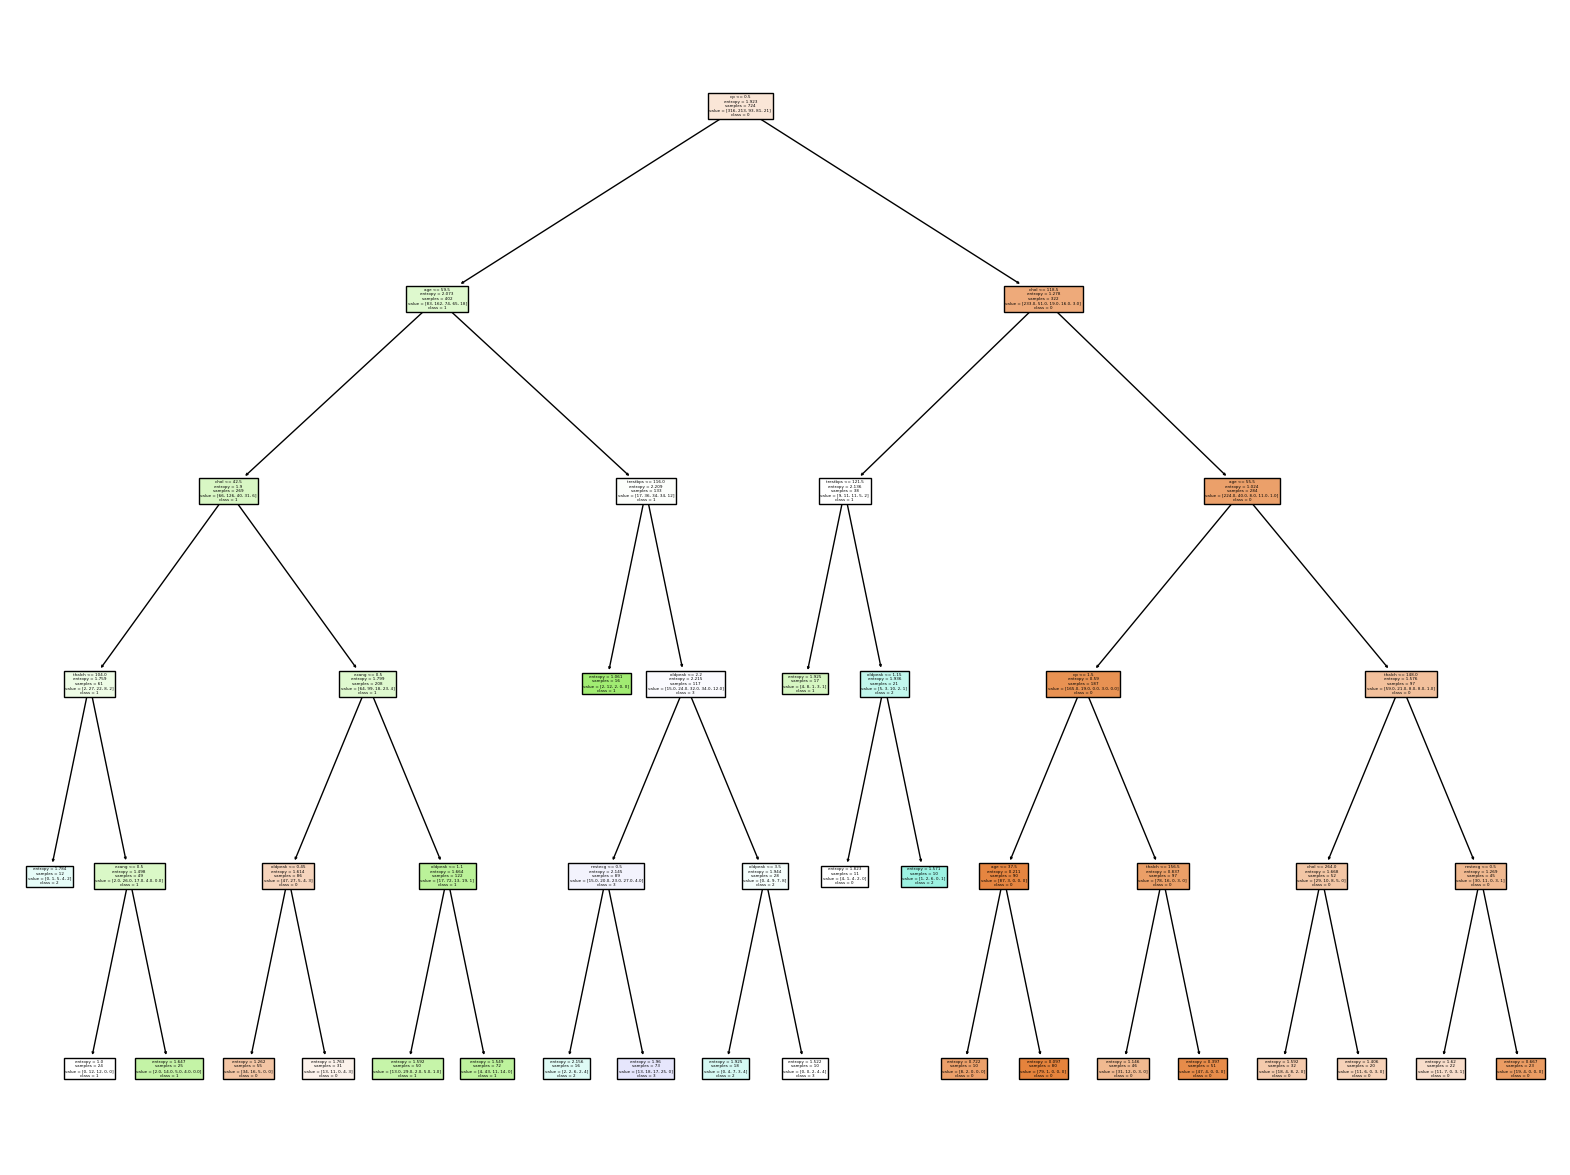

In [36]:
# visualization tree
from sklearn.tree import plot_tree
ftr_name = ['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal'] #feature names
cls_name = ['0','1','2','3', '4'] #class 

#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
plt.figure(figsize = (20,15))
plot_tree(model,
          feature_names = ftr_name, 
          class_names = cls_name,
          filled = True)

plt.show()

# Decision Tree Classifier

In [37]:
modelg = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, criterion='gini')  # using gini
modelg.fit(X_train,y_train)
ydtc_train = modelg.predict(X_train)

In [38]:
cm = confusion_matrix(y_train,ydtc_train) # on training
cm

array([[270,  38,   7,   1,   0],
       [ 47, 150,  11,   5,   0],
       [ 11,  42,  38,   2,   0],
       [ 10,  45,  12,  14,   0],
       [  2,   6,  12,   1,   0]], dtype=int64)

In [39]:
print(classification_report(y_train,ydtc_train,zero_division=1))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       316
           1       0.53      0.70      0.61       213
           2       0.47      0.41      0.44        93
           3       0.61      0.17      0.27        81
           4       1.00      0.00      0.00        21

    accuracy                           0.65       724
   macro avg       0.68      0.43      0.43       724
weighted avg       0.66      0.65      0.62       724



In [40]:
ydtc_test = modelg.predict(X_test) # on testing
cm = confusion_matrix(y_test,ydtc_test)
cm

array([[65, 14,  4,  0,  0],
       [17, 31,  4,  0,  0],
       [ 2, 10,  3,  1,  0],
       [ 6, 12,  5,  0,  0],
       [ 2,  3,  2,  0,  0]], dtype=int64)

In [41]:
print(classification_report(y_test,ydtc_test,zero_division=1))

              precision    recall  f1-score   support

           0       0.71      0.78      0.74        83
           1       0.44      0.60      0.51        52
           2       0.17      0.19      0.18        16
           3       0.00      0.00      0.00        23
           4       1.00      0.00      0.00         7

    accuracy                           0.55       181
   macro avg       0.46      0.31      0.29       181
weighted avg       0.50      0.55      0.50       181



# Hyperparameter tuning with gridsearch CV

In [42]:
tree = DecisionTreeClassifier()    # intialize the decision tree model

param_grid = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None,4,5,9,11,13,15,17,18,19,20,22],
    'min_samples_split': [2,4,5,6,8,9,10,11,12,14,15,18],
    'min_samples_leaf': [1, 2, 5,6,8,9,10,12,14,16,18,20]         # created dict for parameters
}

grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5,
                           n_jobs=-1, verbose=1) # intialize the gridsearch cv model
grid_search.fit(X_train, y_train)   # fitted the model

best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 3456 candidates, totalling 17280 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 14, 'min_samples_split': 2}


In [43]:
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_train)  # on training data
print(classification_report(y_train,y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       316
           1       0.56      0.51      0.54       213
           2       0.45      0.35      0.40        93
           3       0.34      0.31      0.32        81
           4       0.36      0.24      0.29        21

    accuracy                           0.61       724
   macro avg       0.49      0.45      0.47       724
weighted avg       0.59      0.61      0.60       724



In [44]:
y_predtest = final_model.predict(X_test) # on testing data
print(classification_report(y_test, y_predtest, zero_division=1))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        83
           1       0.45      0.42      0.44        52
           2       0.17      0.19      0.18        16
           3       0.38      0.22      0.28        23
           4       0.00      0.00      0.00         7

    accuracy                           0.54       181
   macro avg       0.34      0.33      0.33       181
weighted avg       0.50      0.54      0.51       181



# Model Evaluation & Analysis 

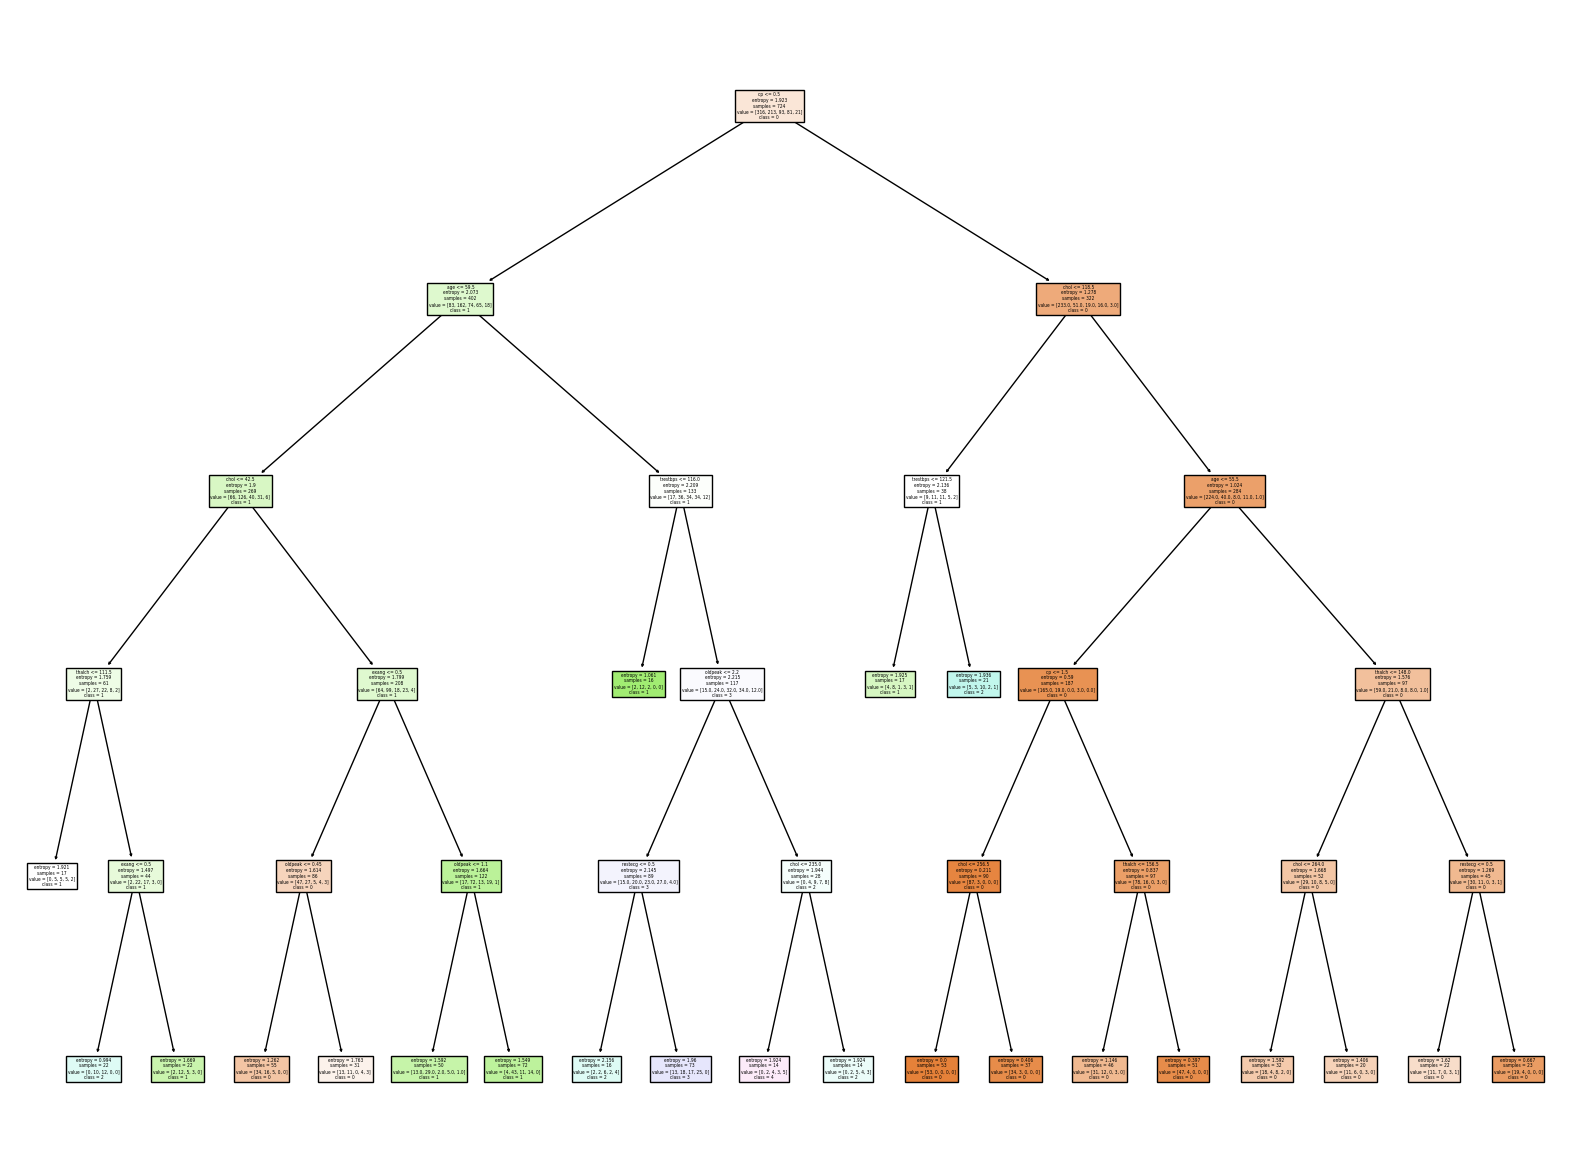

In [45]:
#visualization tree
fn=['age','sex','cp','trestbps','chol','fbs','restecg','thalch','exang','oldpeak','slope','thal'] #feature names
cn=['0','1','2','3', '4'] #class 

#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
plt.figure(figsize = (20,15))
plot_tree(final_model,
          feature_names = fn, 
          class_names = cn,
          filled = True)

plt.show()

# Interview Questions

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

Criterion: This parameter determines the function to measure the quality of a split. Common options are 'gini' for the Gini impurity and 'entropy' for the information gain. It affects how the decision tree splits the nodes.
Max Depth: This parameter sets the maximum depth of the tree. Limiting the depth of the tree helps prevent overfitting, as deeper trees are more likely to capture noise in the data.
Min Samples Split: This parameter sets the minimum number of samples required to split an internal node. Higher values prevent the model from learning overly specific patterns, thereby reducing overfitting.
Min Samples Leaf: This parameter sets the minimum number of samples required to be at a leaf node. Similar to min_samples_split, it prevents overfitting by ensuring that leaf nodes have enough samples.

### 2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding: This technique assigns a unique integer to each category in a categorical variable. For example, if a column contains ["red", "green", "blue"], it can be encoded as [0, 1, 2]. Label encoding is suitable when the categorical variable has an inherent ordinal relationship.

One-Hot Encoding: This technique converts categorical variables into a series of binary columns, each representing a unique category. For example, ["red", "green", "blue"] would be converted to three columns: [1, 0, 0], [0, 1, 0], and [0, 0, 1]. One-hot encoding is suitable for nominal categorical variables without any ordinal relationship. It avoids imposing any ordinal relationship between the categories, unlike label encoding.